In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('SK.csv',header=None)
print(data.shape)
data=data.dropna()
print(data.shape)

(71020, 44)
(71020, 44)


In [3]:
shape=data.shape
N=shape[0]

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))
LPF = np.zeros((N,1))

for ii in range(0,N):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,3]
    l2 = data.iloc[ii,4]
    l3 = data.iloc[ii,5]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1*0.01
    Ls[ii,1,0]=l2*0.01
    Ls[ii,2,0]=l3*0.01
    
    Y[ii,:] = data.iloc[ii][[8,10,13,16,19,22,25,28,31,34,37,40,43]]
    LPF[ii,0]= data.iloc[ii][6]

    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



    

In [4]:
print(X[0])
print(Ls[0])
print(Y[0])


[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[2.38]
 [2.38]
 [4.76]]
[ 0.         -0.00360423 -0.00743174 -0.0265086  -0.00496326 -0.00053225
  0.0246471  -0.00157688 -0.00086909 -0.00065182 -0.00043455 -0.00021727
  0.        ]


In [5]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=100, batch_size=32, verbose=1)  

#model.save('SKmodel.h5')
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1




Tensor("dense_1/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 3), dtype=float32)



Train on 71020 samples, validate on 71020 samples
Epoch 1/100
71020/71020 [==============================] - 11s 154us/step - loss: 3.2999e-04 - val_loss: 7.1910e-05
Epoch 2/100
71020/71020 [==============================] - 11s 150us/step - loss: 6.2195e-05 - val_loss: 5.7714e-05
Epoch 3/100
71020/71020 [==============================] - 11s 150us/step - loss: 5.6138e-05 - val_loss: 5.2929e-05
Epoch 4/100
71020/71020 [==============================] - 11s 152us/step - loss: 5.0678e-05 - val_loss: 4.8973e-05
Epoch 5/100
71020/71020 [==============================] - 11s 162us/step - loss: 4.6741e-05 - val_loss: 4.3795e-05
Epoch 6/100
71020/71020 [==============================] - 12s 168us/step - loss: 4.4005e-05 - val_loss: 4.4393e-05
Epoch 7/100
71020/71020 [==============================] - 12s 164us/step - loss: 4.3099e-05 - val_loss: 4.2396e-05
Epoch 8/100
71020/71

71020/71020 [==============================] - 10s 142us/step - loss: 1.3910e-05 - val_loss: 1.3558e-05
Epoch 59/100
71020/71020 [==============================] - 11s 149us/step - loss: 1.3795e-05 - val_loss: 1.3829e-05
Epoch 60/100
71020/71020 [==============================] - 11s 158us/step - loss: 1.3743e-05 - val_loss: 1.4703e-05
Epoch 61/100
71020/71020 [==============================] - 11s 154us/step - loss: 1.3726e-05 - val_loss: 1.4213e-05
Epoch 62/100
71020/71020 [==============================] - 12s 163us/step - loss: 1.3651e-05 - val_loss: 1.3186e-05
Epoch 63/100
71020/71020 [==============================] - 11s 160us/step - loss: 1.3690e-05 - val_loss: 1.3078e-05
Epoch 64/100
71020/71020 [==============================] - 11s 150us/step - loss: 1.3624e-05 - val_loss: 1.2996e-05
Epoch 65/100
71020/71020 [==============================] - 11s 157us/step - loss: 1.3555e-05 - val_loss: 1.3023e-05
Epoch 66/100
71020/71020 [==============================] - 12s 170us/step - 

<Figure size 640x480 with 1 Axes>

In [18]:
from keras.models import load_model
model=load_model('SKmodel.h5')

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [38. 38. 38.]


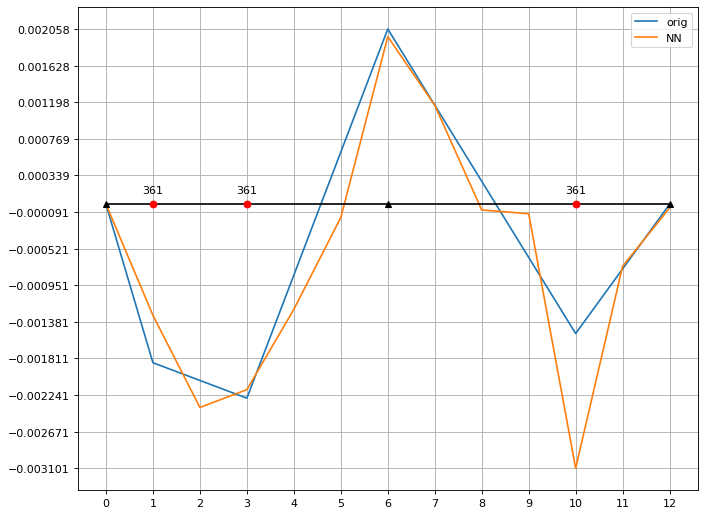

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.] [134. 268.  67.]


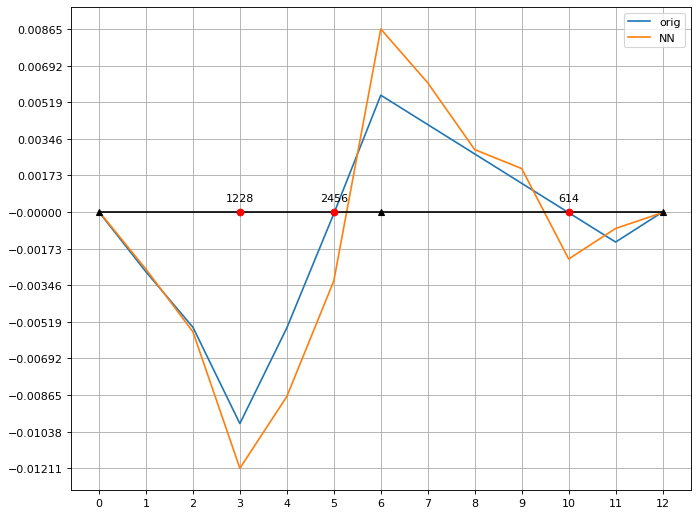

[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [ 99.   49.5 198. ]


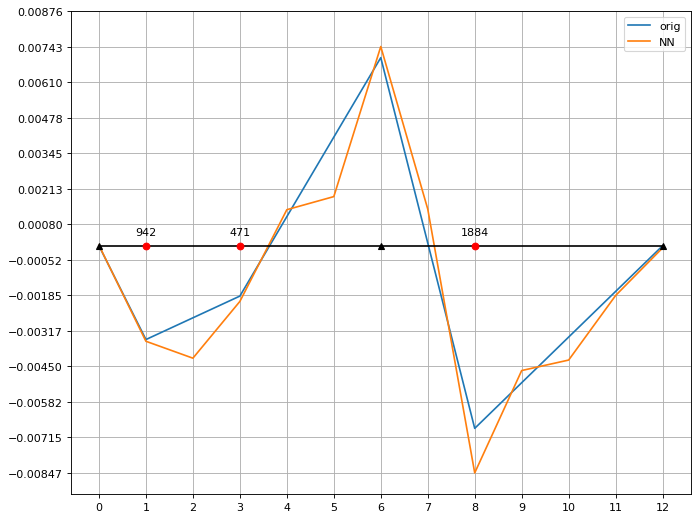

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [361. 361. 722.]


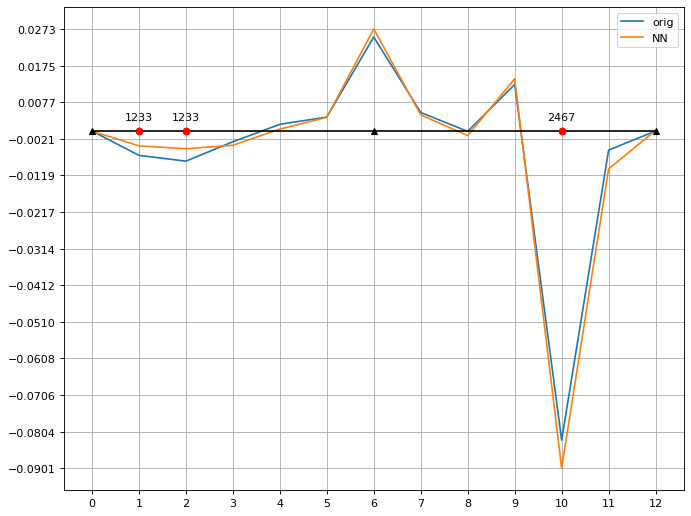

[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.] [ 90. 180.  90.]


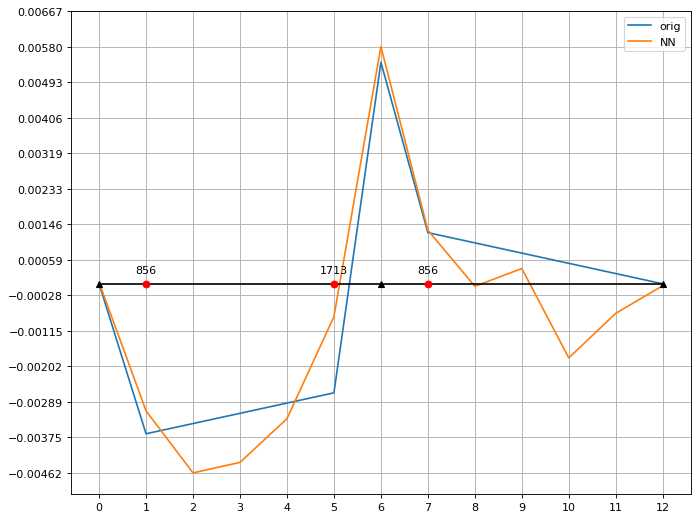

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [24. 48. 24.]


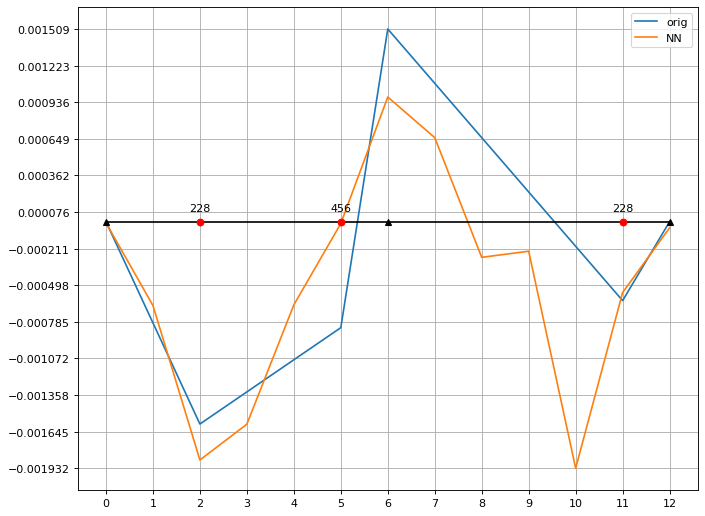

[0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [152.  76.  76.]


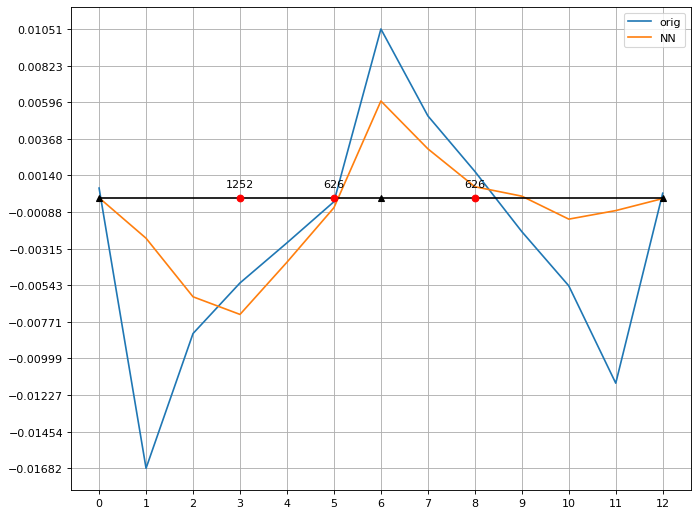

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.] [ 89.  89. 178.]


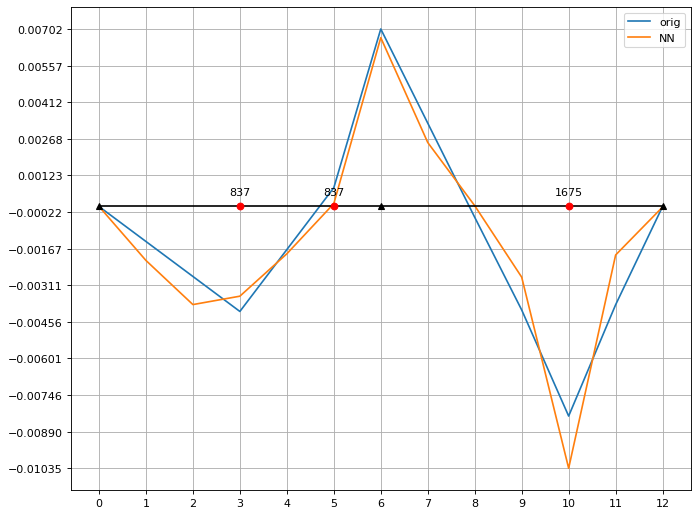

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [195.  195.   97.5]


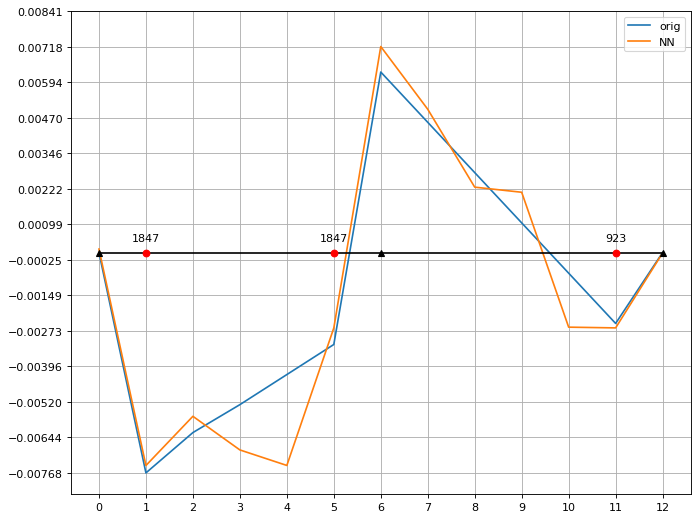

[0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.] [117. 234. 117.]


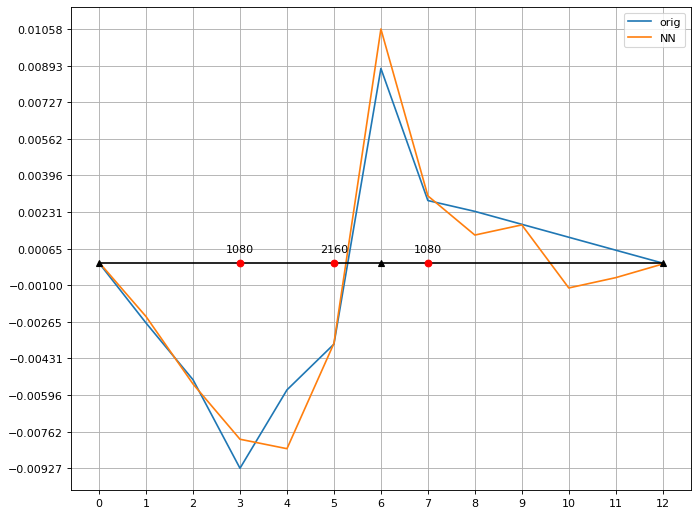

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [366. 183. 366.]


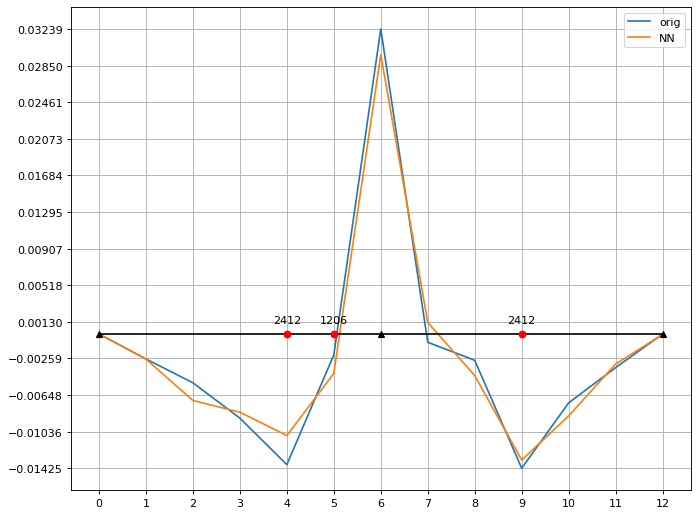

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [237. 474. 474.]


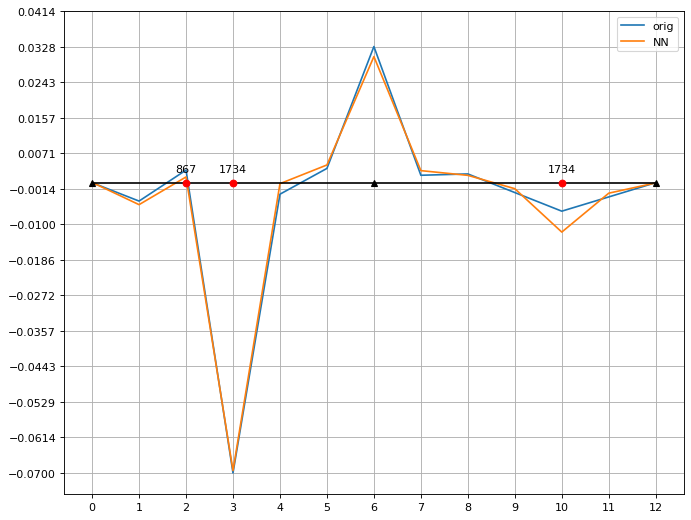

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [2. 4. 4.]


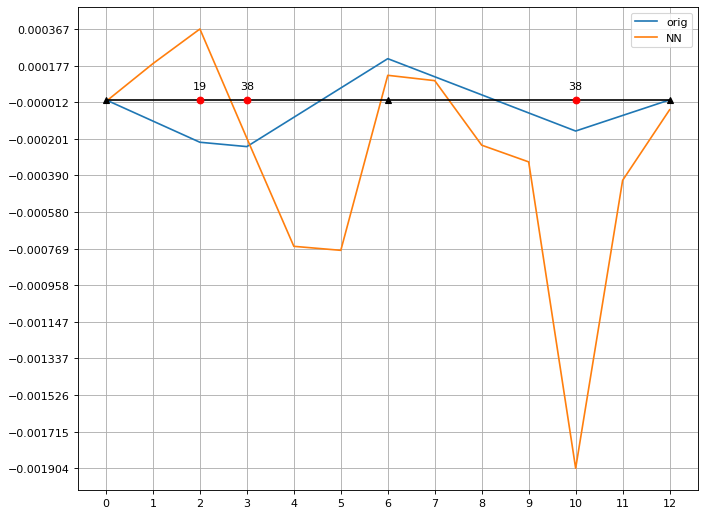

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [288. 144. 144.]


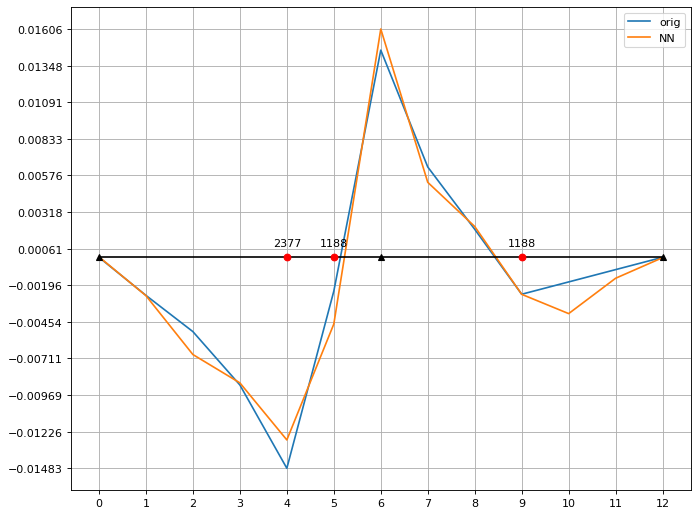

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [43.  21.5 21.5]


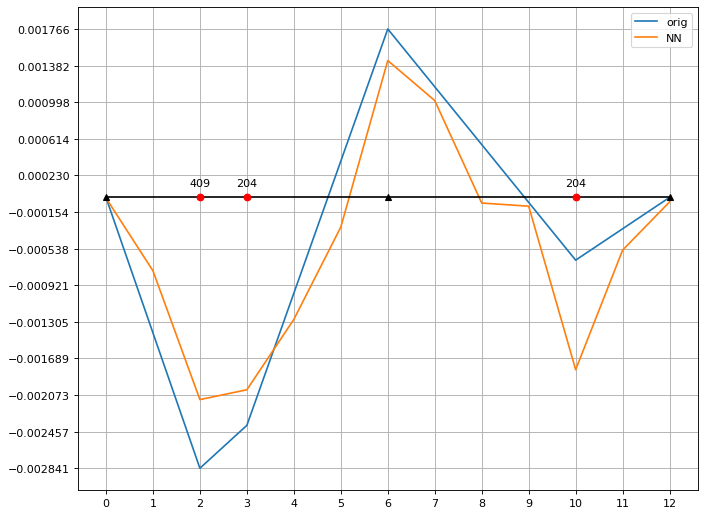

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [88. 44. 44.]


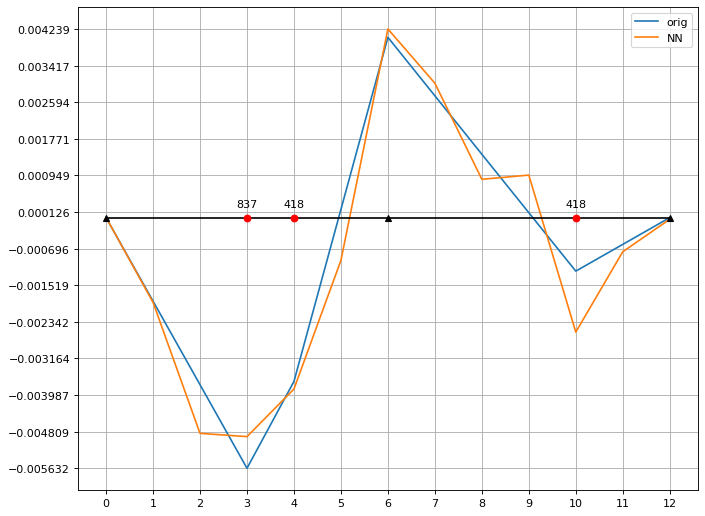

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [11.  11.   5.5]


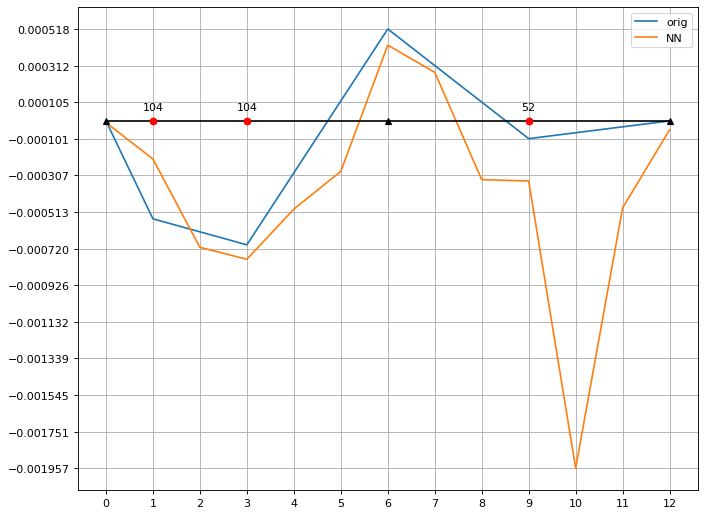

[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [224. 448. 224.]


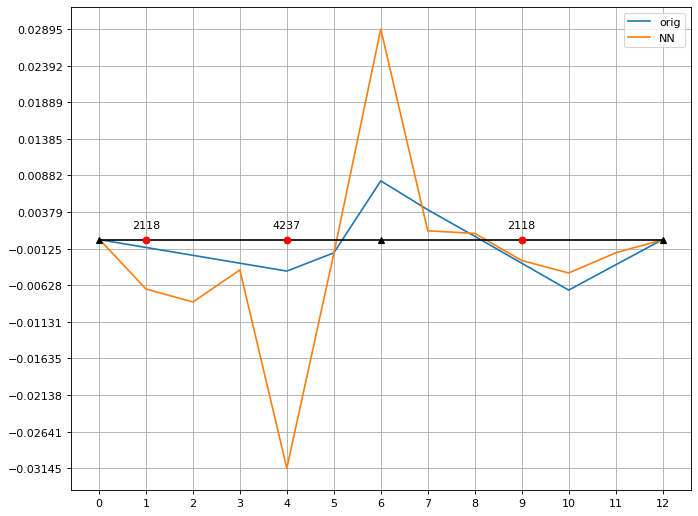

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [169.  338.   84.5]


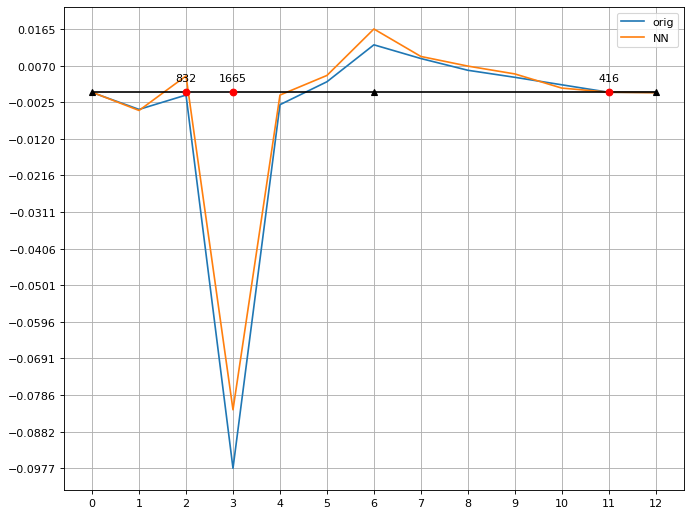

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [116.  58. 116.]


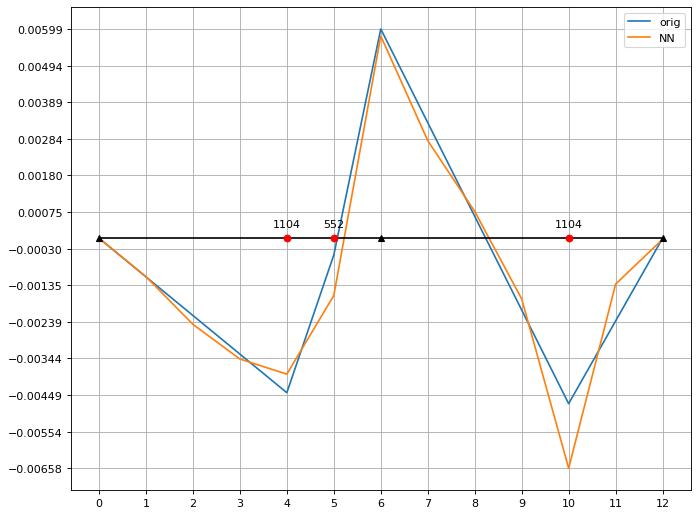

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [274. 137. 548.]


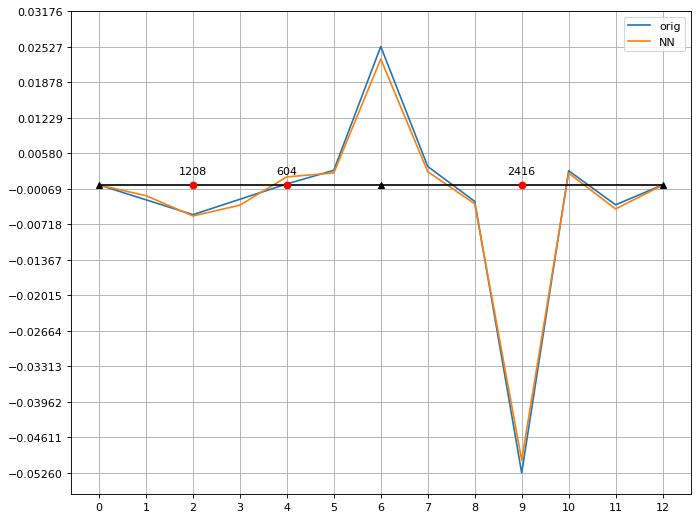

[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.] [397.  397.  198.5]


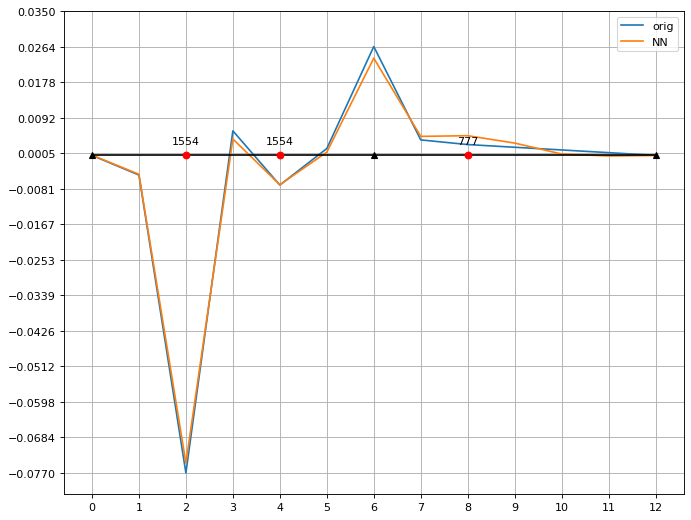

In [19]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time

from matplotlib.pyplot import figure


for ii in range(42322,42344):
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0]*100)
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [7]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [1.174e-04 2.290e-03 1.698e-03 1.880e-03 1.489e-03 1.730e-03 1.891e-03
 1.736e-03 1.545e-03 9.926e-04 1.511e-03 1.563e-03 3.825e-05]


In [8]:
Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)*0.01
    Pesos_05[i,1,0] = 30*(i+1)/2*0.01
    Pesos_05[i,2,0] = 30*(i+1)/2*0.01
    Pesos_1[i,0,0] = 30*(i+1)*0.01
    Pesos_1[i,1,0] = 30*(i+1)*0.01
    Pesos_1[i,2,0] = 30*(i+1)*0.01
    Pesos_2[i,0,0] = 30*(i+1)*0.01
    Pesos_2[i,1,0] = 30*(i+1)*2*0.01
    Pesos_2[i,2,0] = 30*(i+1)*2*0.01
    
    
Inc_SK_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_SK_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_SK_2 = model.predict([Pos,Pesos_2[:,:,0]])
print(Pesos_05)
print(Pesos_1)
print(Pesos_2)

[[[0.3 ]
  [0.15]
  [0.15]]

 [[0.6 ]
  [0.3 ]
  [0.3 ]]

 [[0.9 ]
  [0.45]
  [0.45]]

 [[1.2 ]
  [0.6 ]
  [0.6 ]]

 [[1.5 ]
  [0.75]
  [0.75]]

 [[1.8 ]
  [0.9 ]
  [0.9 ]]

 [[2.1 ]
  [1.05]
  [1.05]]

 [[2.4 ]
  [1.2 ]
  [1.2 ]]

 [[2.7 ]
  [1.35]
  [1.35]]

 [[3.  ]
  [1.5 ]
  [1.5 ]]

 [[3.3 ]
  [1.65]
  [1.65]]

 [[3.6 ]
  [1.8 ]
  [1.8 ]]

 [[3.9 ]
  [1.95]
  [1.95]]]
[[[0.3]
  [0.3]
  [0.3]]

 [[0.6]
  [0.6]
  [0.6]]

 [[0.9]
  [0.9]
  [0.9]]

 [[1.2]
  [1.2]
  [1.2]]

 [[1.5]
  [1.5]
  [1.5]]

 [[1.8]
  [1.8]
  [1.8]]

 [[2.1]
  [2.1]
  [2.1]]

 [[2.4]
  [2.4]
  [2.4]]

 [[2.7]
  [2.7]
  [2.7]]

 [[3. ]
  [3. ]
  [3. ]]

 [[3.3]
  [3.3]
  [3.3]]

 [[3.6]
  [3.6]
  [3.6]]

 [[3.9]
  [3.9]
  [3.9]]]
[[[0.3]
  [0.6]
  [0.6]]

 [[0.6]
  [1.2]
  [1.2]]

 [[0.9]
  [1.8]
  [1.8]]

 [[1.2]
  [2.4]
  [2.4]]

 [[1.5]
  [3. ]
  [3. ]]

 [[1.8]
  [3.6]
  [3.6]]

 [[2.1]
  [4.2]
  [4.2]]

 [[2.4]
  [4.8]
  [4.8]]

 [[2.7]
  [5.4]
  [5.4]]

 [[3. ]
  [6. ]
  [6. ]]

 [[3.3]
  [6.6]
  [6.6]]


In [9]:
SK05 =  pd.read_csv('sk_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('sk_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('sk_alpha2_beta2.csv', header=None)

sk05=[]
sk1=[]
sk2=[]

load05=[]
load1=[]
load2=[]
for i in range(0,13):
    load05.append(int(SK05.iloc[i][3]*SK05.iloc[i][6]))
    load1.append(int(SK1.iloc[i][3]*SK1.iloc[i][6]))
    load2.append(int(SK2.iloc[i][3]*SK2.iloc[i][6]))
    
    sk05.append(SK05.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    sk1.append(SK1.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    sk2.append(SK2.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    
    
import math
def soma(a):
    print(a)
    out=0
    for i in a:
        if i!= math.inf:
            out+=i
        
    return out
    

def make_graph(_xx,_var,sk,_load,_title):
 
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(1,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'b',label='NN') 
        plt.plot(_xx,sk[i],'r',label='Original')

    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)
    
    plt.title(_title,fontsize=20)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    

    
    err =err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print('Posição \t Erro Relativo Médio')
    for i in range(13):
        print(str(i)+" metros \t"+str(err[i].round(2))+'%')
    

    print(soma(np.abs((_var[0][1:12]-sk[0][1:12])/sk[0][1:12]*100))/11)

            
    
    


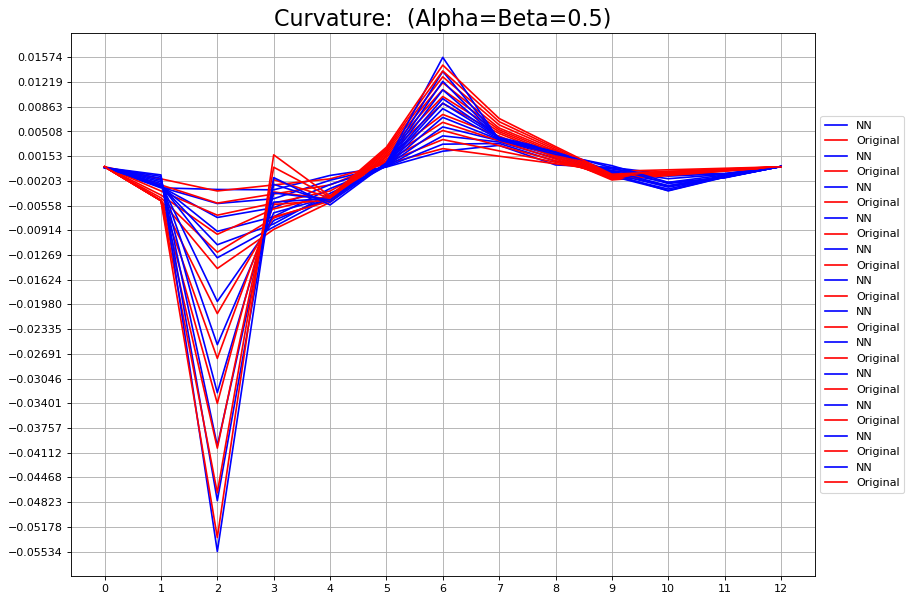

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	71.38%
2 metros 	7.6%
3 metros 	357.59%
4 metros 	26.97%
5 metros 	97.19%
6 metros 	11.72%
7 metros 	53.19%
8 metros 	52.16%
9 metros 	69.29%
10 metros 	185.94%
11 metros 	268.43%
12 metros 	inf%
10    258.134
13    28.3091
16    67.6983
19    108.171
22    107.937
25    27.5335
28    261.736
31    280.931
34    139.769
37    230.941
40    726.108
Name: 0, dtype: object
203.38791800925847


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [10]:
make_graph(xticks,Inc_SK_05,sk05,load05, 'Curvature:  (Alpha=Beta=0.5)')


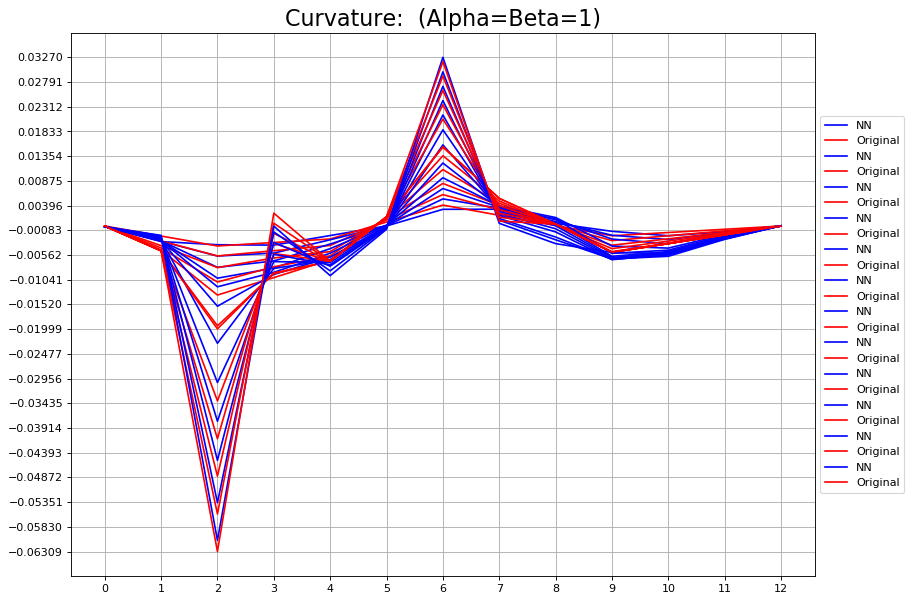

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	61.2%
2 metros 	9.45%
3 metros 	61.58%
4 metros 	28.1%
5 metros 	114.09%
6 metros 	12.26%
7 metros 	47.27%
8 metros 	583.88%
9 metros 	29.39%
10 metros 	58.86%
11 metros 	51.09%
12 metros 	inf%
10    220.563
13    21.4376
16    51.6537
19    96.6941
22    92.2429
25    36.1897
28    172.779
31    686.243
34    79.1242
37    79.9613
40     209.26
Name: 0, dtype: object
158.74077869819564


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [11]:
make_graph(xticks,Inc_SK_1,sk1,load1,'Curvature:  (Alpha=Beta=1)')

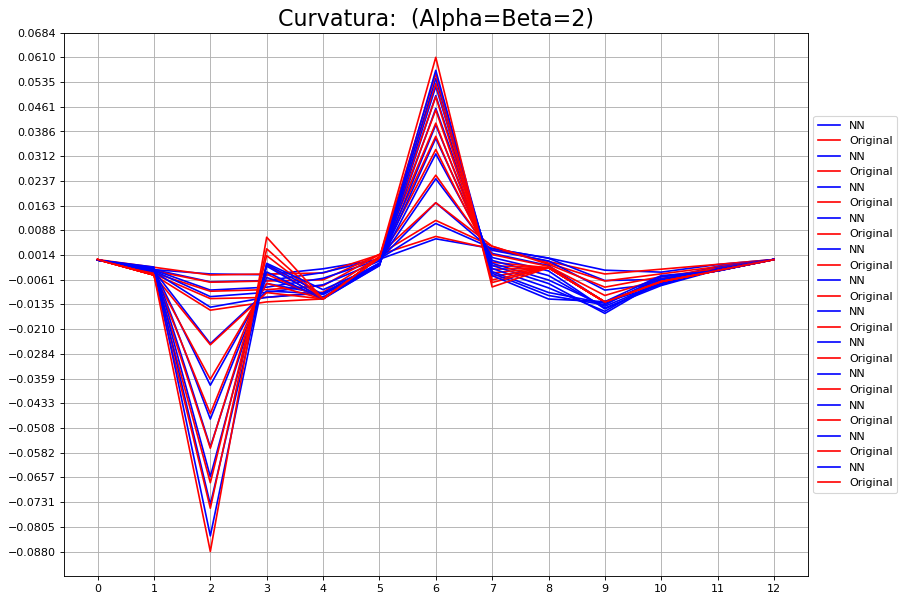

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	45.79%
2 metros 	5.47%
3 metros 	62.55%
4 metros 	18.88%
5 metros 	284.32%
6 metros 	5.5%
7 metros 	59.96%
8 metros 	191.74%
9 metros 	16.67%
10 metros 	24.22%
11 metros 	9.93%
12 metros 	inf%
10     165.76
13    22.7915
16    19.8818
19    26.9409
22    100.707
25    24.4967
28    94.3119
31    151.451
34    42.1679
37    38.8302
40    56.8153
Name: 0, dtype: object
67.65045986610497


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [12]:
make_graph(xticks,Inc_SK_2,sk2,load2,'Curvatura:  (Alpha=Beta=2)')

In [13]:
sk05[5]

8    -1.16415e-10
10    -0.00447063
13     -0.0122923
16    -0.00735308
19    -0.00469897
22      0.0013899
25     0.00752636
28     0.00440364
31     0.00135404
34    -0.00170832
37    -0.00113888
40   -0.000569441
43   -1.45519e-11
Name: 5, dtype: object

In [14]:
condition=data.iloc[np.where(data.iloc[:][0]==1)]
condition=condition.iloc[np.where(condition.iloc[:][1]==5)]
condition=condition.iloc[np.where(condition.iloc[:][2]==7)]
condition=condition.iloc[np.where(condition.iloc[:][3]>condition.iloc[:][4])]
condition=condition.iloc[np.where(condition.iloc[:][3]>condition.iloc[:][5])]
condition

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
162,1,5,7,31.0,15.5,15.5,9.517813,,-2.910380e-11,-0.000548,...,0.000083,0.000083,0.000069,0.000055,0.000055,0.000041,0.000028,0.000028,0.000014,9.094950e-13
466,1,5,7,159.0,79.5,79.5,9.517813,,0.000000e+00,-0.000270,...,-0.000118,-0.000118,-0.000432,-0.000746,-0.000746,-0.000560,-0.000373,-0.000373,-0.000187,-1.455190e-11
1038,1,5,7,398.0,199.0,199.0,7.289701,,6.101010e-04,-0.006177,...,0.001096,0.001096,0.000913,0.000731,0.000731,0.000548,0.000365,0.000365,0.000183,1.455190e-11
2047,1,5,7,207.0,103.5,103.5,9.489968,,0.000000e+00,-0.003650,...,0.000552,0.000552,0.000460,0.000368,0.000368,0.000276,0.000184,0.000184,0.000092,3.637980e-12
2074,1,5,7,77.0,38.5,38.5,9.517813,,-5.820770e-11,-0.001362,...,0.000205,0.000205,0.000171,0.000137,0.000137,0.000103,0.000068,0.000068,0.000034,1.818990e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68350,1,5,7,331.0,165.5,165.5,8.697246,,6.035340e-04,-0.006157,...,0.000907,0.000907,0.000756,0.000605,0.000605,0.000454,0.000302,0.000302,0.000151,7.275960e-12
68815,1,5,7,36.0,18.0,18.0,9.517813,,-2.910380e-11,-0.000637,...,0.000096,0.000096,0.000080,0.000064,0.000064,0.000048,0.000032,0.000032,0.000016,0.000000e+00
69134,1,5,7,299.0,149.5,149.5,8.921545,,3.795790e-04,-0.005463,...,0.000820,0.000820,0.000684,0.000547,0.000547,0.000410,0.000273,0.000273,0.000137,7.275960e-12
69179,1,5,7,107.0,53.5,53.5,9.517813,,0.000000e+00,-0.001892,...,0.000285,0.000285,0.000238,0.000190,0.000190,0.000143,0.000095,0.000095,0.000048,1.818990e-12


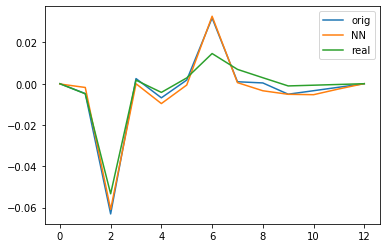

In [15]:
plt.plot(xticks,Y[39978,:],label='orig')
plt.plot(xticks,y_pred1[39978,:],label='NN')
plt.plot(xticks,sk05[12],label='real')
plt.legend()
plt.show()
    
